In [1]:
#success rate exp
#generate trajectory without using gazebo

import sys
import os

from util.pc_data_utils import CameraInfo
import numpy as np
from scipy.spatial.transform import Rotation as R

from PIL import Image
import open3d as o3d
import os
import copy
_PROXY_VARS = [
    "http_proxy", "https_proxy", "HTTP_PROXY", "HTTPS_PROXY",
    "ALL_PROXY", "all_proxy", "no_proxy", "NO_PROXY"
]

for v in _PROXY_VARS:
    os.environ.pop(v, None)     


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
applied_robot_num = 2
robot_list = [f"robot{i+1}" for i in range(applied_robot_num)]
obj_name_list = ['chair']
data_dir = "./" #path to your data


In [3]:
#get the current AGV pose
from util.robot_control import RobotControl
from util.tf_manager import tf_manager
import rospy
from scipy.spatial.transform import Rotation as R
import numpy as np
from util.funcs import T_to_xyzrpy,xyzrpy_to_T
import time
#init ros
rospy.init_node("main_control")


swarm_control = RobotControl(robot_list)

#init grasp control
tf_instance = tf_manager(robot_list,obj_name_list)


time.sleep(2)

INFO - 2025-07-24 21:29:44,643 - topics - topicmanager initialized


In [4]:

robot_pose1 = np.load(os.path.join(data_dir, f'stage1_pose0.npy'))
robot_pose2 = np.load(os.path.join(data_dir, f'stage2_pose0.npy'))
path = np.load(os.path.join(data_dir, f'obj_pose0.npy'))


In [5]:
#be prepared for simulation control
tf_instance.remove_grasp(robot_list[0],obj_name_list[0])
swarm_control.reset_scene()

[INFO] [1753363787.158486, 4.099000]: Gazebo world has been successfully reset.


need about 100.0 seconds to finish the grasping process
path following finished


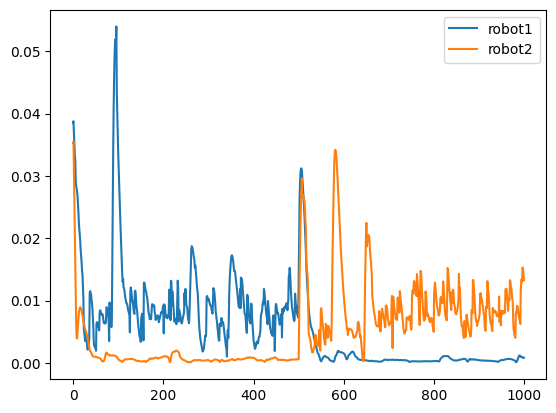

[[-7.47193008e-01  1.99780806e-01 -6.33869260e-01 -4.37835870e-01]
 [ 6.64606485e-01  2.25912359e-01 -7.12223157e-01 -4.15697705e-01]
 [ 9.10382929e-04 -9.53441784e-01 -3.01575754e-01  4.06485503e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [6]:
from util.path_follow import path_following
from IPython.display import HTML
follower = path_following(robot_list)
dt = 0.1
print(f"need about {len(robot_pose1)*dt} seconds to finish the grasping process")
follower.follow_path(robot_pose1,swarm_control,tf_instance.get_now_world_robot_pose,dt = dt)
follower.visual_last_error()
print(tf_instance.get_robot_ee_pose(robot_list[0]))

In [7]:
#control the simulation
# tf_instance.add_grasp(robot_list[0],obj_list[0])
for now_robot in robot_list:
    swarm_control.gripper_pose(now_robot,0.5)

follower = path_following(robot_list)
dt = 0.2
print(f"need about {len(robot_pose2)*dt} seconds to finish the grasping process")
follower.follow_path(robot_pose2,swarm_control,tf_instance.get_now_world_robot_pose,
                     path,tf_instance.direct_set_obj_pose,obj_name = 'chair',dt = dt)
follower.visual_last_error()

need about 100.0 seconds to finish the grasping process


NameError: name 'path' is not defined

: 